# Ejercicio 1

In [4]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns

## Importación de los sets de train y test.
Se eliminan los headers y los footers.
Se verifican los tamaños de los sets y las categorías a las que corresponden los artículos.

In [5]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, remove=('headers', 'footers'))
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, remove=('headers', 'footers'))
print('Length train: '+ str(len(twenty_train.data)))
print('Length test: '+ str(len(twenty_test.data)))

print(twenty_train.target_names)

Length train: 11314
Length test: 7532
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
# A fin de analizar el formato de los artículos, se imprimen los primeros 5.
for i in range(5):
    print('NEW DATA')
    print(twenty_train.data[i])

NEW DATA
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
NEW DATA
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't ans

## Balance de Clases

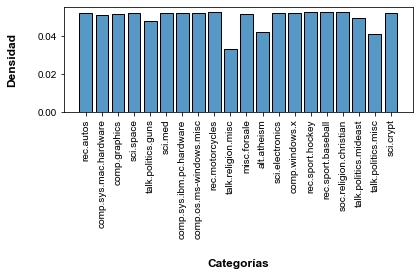

In [7]:
np_target_names = np.array(twenty_train.target_names)
np_target = np.array(twenty_train.target)
hist = sns.histplot(np_target_names[np_target],stat="density", discrete=True, shrink=.8)
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=90);
hist.set_xlabel("Categorías", labelpad=20, weight='bold', size=12)
hist.set_ylabel("Densidad", labelpad=20, weight='bold', size=12)
plt.tight_layout()

## Preprocesamiento.

Antes de alimentar al modelo con los textos, es necesario transformarlos a fin de aumentar la consistencia de la métrica a obtener. Para ello se siguen una serie de pasos que se explican a continuación,.

### Tokenización
La tokenización es el proceso por el cual una gran cantidad de texto se divide en partes más pequeñas llamadas tokens. Los tokens serán utilizados para posteriormente procesar individualmente cada palabra del texto.
### Lematización
La lematización tiene en cuenta el análisis morfológico de las palabras para transformarlas. Distintas palabras que corresponden a un mismo concepto pero varían levemente -o no varían- en su significado son llevadas a una forma en común que las representa a todas. En general esta forma coincide con el formato de las palabras que se encuentran en el diccionario. Por ejemplo, los verbos son transformados en sus infinitivos y los plurales en singulares.
### Stopwords
Las "stopwords" son las palabras comunes más comunes en un idioma. Por esta razón, tenerlas en cuenta para el modelo que se desea implementar no aporta información relevante en cuanto a la categorización de los textos e implica mayor tiempo de procesamiento. Como ejemplo las palabras "a", "de", "y", "el" y "o" son consideradas stopwords en el idioma español.
### Estemizado
El estemizado reduce las palabras a su raíz y es utilizado en el preprocesamiento del texto con el objetivo de unificar términos cuyos sufijos varían pero pertenecen a las mismas clases. Por ejemplo, las palabras "niños" y "niñez" podrían ser reducidas mediante esta técnica a la raíz "niñ".
### Filtrado de no alfabéticos.
Una vez aplicadas las técnicas mencionadas anteriormente, es probable que el vocabulario siga contando con tokens que no sean palabras. Estos tokens, como signos de puntuación o números, no aportan información útil al procesamiento por lo tanto deben ser eliminados para mejorar el rendimiento del modelo.

### NLTK
La librería NLTK (Natural Language Toolkit) contiene herramientas y paquetes con funcionalidades relacionadas al procesamiento estadístico del lenguaje natural. Entre estas herramientas se encuentran las explicadas anteriormente (lematización, estemizado, etc.).

#### Selección del Stemmer
Los tres principales algoritmos de stemming que se utilizan son: Porter Stemmer, Snowball Stemmer y Lancaster Stemmer.  
El algoritmo de Porter es el más antiguo de los tres algoritmos mencionados y es el menos "agresivo". A su vez, implica un alto costo en términos de tiempo de procesamiento. Por su parte, el algoritmo Snowball presenta algunas mejoras con respecto al de Porter y en cuanto a tiempo de procesamiento es algo mas rápido. Por último, el algoritmo de Lancaster es el más rapido de los tres pero el resultado del lematizado es poco intuitivo y de difícil análisis.  
Analizando los beneficios y contras de cada lematizador, decidimos utilizar el ***Snowball Stemmer***, provisto por NLTK. 

#### Selección del Lematizador
***Wordnet*** es una base de datos léxica que proporciona relaciones semánticas entre sus palabras. Wordnet agrupa distintos elementos de datos que son semánticamente equivalentes en "synsets". Es una de las primeras y más utilizadas técnicas de lematización y se encuentra disponible con NLTK. Por estas razones, decidimos utilizar dicho lematizador.  

Sin embargo, este lematizador trata por defecto a todas las palabras como si fueran sustantivos. Así, muchos verbos se mantienen iguales luego de la lematización. Para solucionar este problema, es necesario utilizar etiquetas "***POS***" (Part Of Speech). Por cada palabra, se llama al lematizador con una etiqueta que define su tipo (adjetivo, sustantivo, verbo, etc.). 

 

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') #For POS tags

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pabli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pabli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pabli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pabli\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
# Inicialización del lematizador y del stemmer.
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

In [11]:
#Traduce etiquetas POS de la función nltk.pos_tag en etiquetas que acepta WordNetLemmatizer.
def pos_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [9]:
def pre_process_data(data_in):
    filtered_arts = list()
    aux_porc = -1
    for i in range(len(data_in)):
        ############## TOKENIZE ################
        tokenized = word_tokenize(data_in[i])
        ############## LEMMATIZE ################
        pos_tagged = nltk.pos_tag(tokenized)
        wordnet_tagged = list(map(lambda x: (x[0], pos_tag_to_wordnet_tag(x[1])), pos_tagged))
        lemmatized = list()
        for word, tag in wordnet_tagged:
            if tag is None:
                lemmatized.append(word)
            else:        
                lemmatized.append(lemmatizer.lemmatize(word, tag))
        ############## STOP WORDS ################
        stop = [lem for lem in lemmatized if lem not in stopwords.words('english')]
        ############## STEMMER ################
        stemmed=[stemmer.stem(w) for w in stop]
        ############## REMOVE NON ALPHA ################
        alpha = [st for st in stemmed if st.isalpha()]
        ############## JOIN ################
        filtered_arts.append(" ".join(alpha))
        ########## PRINT PROGRESS ############
        porc = int((i/len(data_in))*100)
        if (porc!=aux_porc):
            print(str("\rProcesado: " + str(porc) + "%"), end="")
            porc = aux_porc
    return filtered_arts


In [73]:
filteredArts = pre_process_data(twenty_train.data)

Procesado: 99%

In [12]:
import pickle
def save_preprocessed_data(file_name,pre_processed_data):
    '''Los datos se guardan en un archivo.'''
    with open(file_name, 'wb') as fp:
        pickle.dump(pre_processed_data, fp)
def load_preprocessed_data(file_name):
    '''Carga los datos de un archivo'''
    with open(file_name,'rb') as fp:
        return pickle.load(fp)

In [74]:
#Se guarda el resultado del preprocesamiento en un archivo mediante la librería Pickle.
save_preprocessed_data('art_filt.pkl', filteredArts)

In [13]:
#Se lee el resultado del preprocesamiento guardado en un archivo mediante la librería Pickle.
articlesList = load_preprocessed_data('art_filt.pkl')

In [14]:
#Se verifica que los artículos hayan sido obtenidos correctamente.
print(str(len(articlesList)))
print(articlesList[0])

11314
i wonder anyon could enlighten car i saw day it sport car look late earli it call bricklin the door realli small in addit front bumper separ rest bodi this i know if anyon tellm model name engin spec year product car make histori whatev info funki look car pleas


### Vectorización
Para el posterior análisis del vocabulario es importante conocer cuantas veces aparecen las palabras en los distintos artículos. Esto servirá para obtener los likelihoods de las categorías dependiendo de las palabras que aparezcan en un texto ingresado al modelo.  
A fin de realizar esta función se utiliza ***CountVectorizer***. Esta herramienta crea una matrix cuyas filas corresponden a cada uno de los artículos y sus columnas a cada palabra de nuestro vocabulario. Los valores de las "celdas" indican cuantas veces aparece cada palabra en cada artículo.  


A su vez, CountVectorizer recibe distintos parámetros, entre los que se encuentran min_df y max_df. El primero de estos indica un límite inferior de la cantidad de documentos (o porcentaje) en los que puede aparecer una palabra del vocabulario. Las palabras que aparezcan en un número menor de documentos a los que establece este límite serán descartadas por CountVectorizer. Estas son palabras que aparecen en una proporción muy pequeña de documentos y no aportan información útil al modelo. Por su parte, max_df establece un límite superior al porcentaje de documentos (o cantidad) en los que puede aparecer una palabra del vocabulario. CountVectorizer ignorará las palabras que superen este límite. Estas palabras, al aparecen en una proporción muy grande de documentos, tampoco aportan información útil. 

Con el objetivo de establecer correctamente los valores de min_df y max_df se realizó un histograma en el que se muestra la cantidad de palabras que existen a lo largo de las distintas frecuencias de documentos.

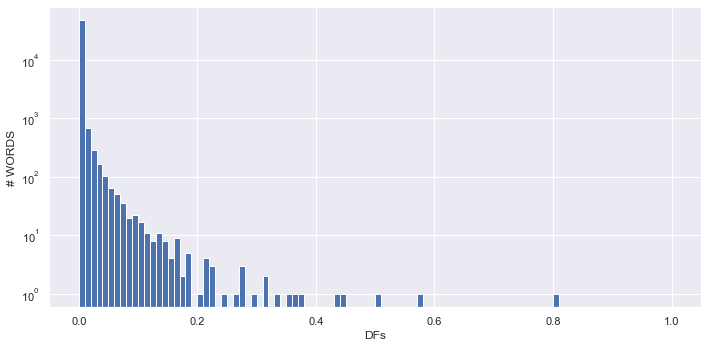

In [15]:
from collections import Counter

#calculate words frequencies per document
word_frequencies = [Counter(article.split()) for article in articlesList]

#calculate document frequency
document_frequencies = Counter()

for word_freq_list in word_frequencies:
    document_frequencies.update(word_freq_list.keys())

dfs = np.array(list(document_frequencies.values()))/len(articlesList)
plt.hist(dfs, bins = 100, range=[0, 1])
plt.xlabel("DFs")
plt.yscale("log")
plt.ylabel("# WORDS")
plt.tight_layout()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(max_df = 0.1, min_df = 5)
# tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 10)
vectorizedData = count_vectorizer.fit_transform(articlesList)
vectorizedDataArray = vectorizedData.toarray() #sparsed -> expanded matrix
vectorizedDataArray.shape

(11314, 12594)

In [17]:
# Se imprime el vocabulario resultante en un txt con el fin de analizarlo visualmente.
with open('word_list.txt', 'w') as fp:
    for word in count_vectorizer.get_feature_names():
        fp.write(word + "\n")

## Entrenamiento del modelo.
### Naive Bayes
Explicación y fórmulas
#### Probabilidades a priori y a posteriori.
#### Likelihoods y LogLikelihoods
### Smoothing Laplaciano

In [30]:
N_cat = len(twenty_train.target_names)
N_arts = vectorizedDataArray.shape[0]
N_words = vectorizedDataArray.shape[1]
prioriProbs = list()
catProbs = list()

for i, target_name in enumerate(twenty_train.target_names):
    category_articles_labels = np.asarray(np_target_names[np_target] == target_name)
    catOcurrency = vectorizedDataArray[category_articles_labels].sum(axis = 0) + alpha #Sum of category ocurrencies
    prioriProbs.append(np.log(catOcurrency/sum(catOcurrency)))
    catProbs.append(np.log(category_articles_labels.sum()/N_arts))



## Testeo del modelo.
### Métricas
Explicación de métricas y de cual utilizamos

### Prueba con set de Train.

In [31]:
predictionOk = 0
for n_art in range(N_arts):
    maxIdx = -1
    maxLogL = -float('inf')
    for i in range(N_cat):
        logL = np.dot((vectorizedDataArray[n_art]),prioriProbs[i])+catProbs[i]
        if (logL > maxLogL):
            maxLogL = logL
            maxIdx = i
    if(maxIdx == twenty_train.target[n_art]):
        predictionOk += 1
print("Accuracy Train: " + str(predictionOk/N_arts))

Accuracy Train: 0.8607035531200283


### Prueba con set de Test.

In [ ]:
#Preprocesamiento del set de Test.
filteredTestArts = pre_process_data(twenty_test.data)

In [83]:
#Se guarda el resultado del preprocesamiento en un archivo mediante la librería Pickle.
save_preprocessed_data('art_filt_test.pkl', filteredTestArts)

In [32]:
#Se lee el resultado del preprocesamiento guardado en un archivo mediante la librería Pickle.
testArticlesList = load_preprocessed_data('art_filt_test.pkl')
#Se verifica que los artículos hayan sido obtenidos correctamente.
print(len(testArticlesList))
print(testArticlesList[0])

7532
i littl confus model bonnevill i hear le se lse sse ssei could someon tell differ far featur perform i also curious know book valu prefer model and much less book valu usual get in word much demand time year i hear earli summer best time buy


In [33]:
# Vectorización del set de test.
testData = count_vectorizer.transform(testArticlesList)
testDataArray = testData.toarray()
print(testData.shape)

(7532, 12594)


### Obtención del accuracy del modelo.

In [34]:
predictionOk = 0
for n_art in range(len(twenty_test.target)):
    maxIdx = -1
    maxLogL = -float('inf')
    for i in range(N_cat):
        logL = np.dot((testDataArray[n_art]),prioriProbs[i])+catProbs[i]
        if (logL > maxLogL):
            maxLogL = logL
            maxIdx = i
    if(maxIdx == twenty_test.target[n_art]):
        predictionOk += 1
print("Accuracy Test: " + str(predictionOk/len(twenty_test.target)))

Accuracy Test: 0.7308815719596389
